# ACC Data Analysis

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import CSV
df = pd.read_csv("ACC-Data-2022-11-05-18-20-51.csv", index_col=0)
df

,Track,Car,CarClass,Session,SessionStatus,Flag,Penalty,InPit,InPitLane,CurrentSector,...,BrakeTemperatureRearLeft,BrakeTemperatureRearRight,BrakeBalance,ABS,FrontBrakeCompound,RearBrakeCompound,CurrentFuel,UsedFuel,FuelPerLap,EstimatedFuelLaps
0,misano,lamborghini_huracan_gt3_evo,gt3,2,2,0,0,0,0,0,...,0.000,0.000,0.00,5,0,0,0.000,0.000,1076468122,15.094
1,misano,lamborghini_huracan_gt3_evo,gt3,2,2,0,0,0,0,0,...,0.000,0.000,0.00,5,0,0,0.000,0.000,1076468122,15.094
2,misano,lamborghini_huracan_gt3_evo,gt3,2,2,0,0,0,0,0,...,0.000,0.000,0.00,5,0,0,0.000,0.000,1076468122,15.094
3,misano,lamborghini_huracan_gt3_evo,gt3,2,2,0,0,0,0,0,...,0.000,0.000,0.00,5,0,0,0.000,0.000,1076468122,15.094
4,misano,lamborghini_huracan_gt3_evo,gt3,2,2,0,0,0,0,0,...,0.000,0.000,0.00,5,0,0,0.000,0.000,1076468122,15.094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,misano,lamborghini_huracan_gt3_evo,gt3,2,2,0,0,0,1,0,...,339.305,336.404,0.72,5,0,0,11.601,28.399,1076268072,4.458
1166,misano,lamborghini_huracan_gt3_evo,gt3,2,2,0,0,0,1,0,...,337.436,334.559,0.72,5,0,0,11.597,28.403,1076268072,4.457
1167,misano,lamborghini_huracan_gt3_evo,gt3,2,2,0,0,0,1,0,...,341.534,338.509,0.72,5,0,0,11.595,28.405,1076268072,4.456
1168,misano,lamborghini_huracan_gt3_evo,gt3,2,2,0,0,0,1,0,...,343.480,340.446,0.72,5,0,0,11.594,28.406,1076268072,4.455


In [3]:
# Data cleaning
# Data frame "df" contains all relevant data points
df = df[df["SessionStatus"] == 2]
df = df[df["Session"] == 2]
df = df[df["LapsCompleted"] > 0]

In [4]:
# Data cleaning pt. 2
# Data frame "df_laps" contains data from the first data point after a new lap begins
df_laps = df.drop_duplicates(subset="LapsCompleted")
df_laps = df_laps.iloc[1:]

In [5]:
# Constants
chart_size_x = 9
chart_size_y = 6

## General Statistics

### Tyre Pressure

In [6]:
df.agg({"TyrePressureFrontLeft": ["min", "median", "max"], "TyrePressureFrontRight": ["min", "median", "max"], "TyrePressureRearLeft": ["min", "median", "max"], "TyrePressureRearRight": ["min", "median", "max"]})

,TyrePressureFrontLeft,TyrePressureFrontRight,TyrePressureRearLeft,TyrePressureRearRight
min,26.804,27.1180,26.2030,26.5120
median,28.566,28.5725,27.7005,27.7775
max,28.832,28.8810,27.8720,27.9870


### Tyre Temperature

In [7]:
df.agg({"TyreTemperatureFrontLeft": ["min", "median", "max"], "TyreTemperatureFrontRight": ["min", "median", "max"], "TyreTemperatureRearLeft": ["min", "median", "max"], "TyreTemperatureRearRight": ["min", "median", "max"]})

,TyreTemperatureFrontLeft,TyreTemperatureFrontRight,TyreTemperatureRearLeft,TyreTemperatureRearRight
min,72.3920,66.832,75.513,70.449
median,90.5985,81.607,90.956,83.484
max,93.4050,84.492,92.855,85.645


### Weather

In [8]:
df.agg({"AmbientTemperature": ["min", "median", "max"], "TrackTemperature": ["min", "median", "max"]})

,AmbientTemperature,TrackTemperature
min,21.334,21.334
median,21.558,21.558
max,21.715,21.715


## Charts

### Tyre Pressure

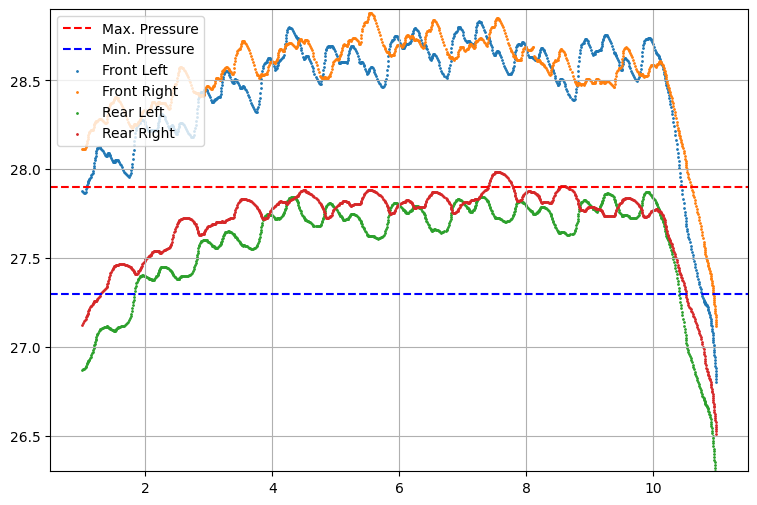

In [9]:
# Tyre Pressure
x_axis = df["LapsCompleted"] + df["TrackPosition"]
y_axis_1, y_axis_2, y_axis_3, y_axis_4  = df["TyrePressureFrontLeft"], df["TyrePressureFrontRight"], df["TyrePressureRearLeft"], df["TyrePressureRearRight"]
plt.figure(figsize=(chart_size_x,chart_size_y))
plt.ylim(26.3, 28.9)
plt.axhline(y=27.9, color="red", linestyle="--", label="Max. Pressure")
plt.axhline(y=27.3, color="blue", linestyle="--", label="Min. Pressure")
plt.scatter(x_axis, y_axis_1, s=1, label="Front Left")
plt.scatter(x_axis, y_axis_2, s=1, label="Front Right")
plt.scatter(x_axis, y_axis_3, s=1, label="Rear Left")
plt.scatter(x_axis, y_axis_4, s=1, label="Rear Right")
plt.legend(loc="upper left")
plt.grid()
plt.show()

### Tyre Temperature

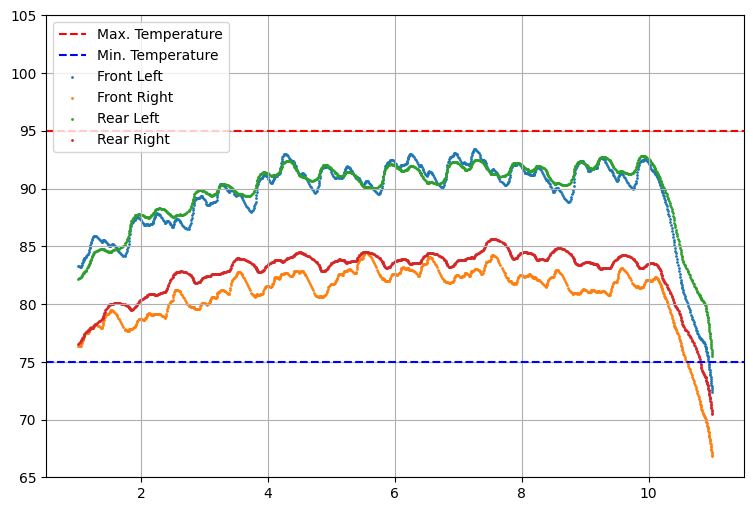

In [10]:
# Tyre Temperature
x_axis = df["LapsCompleted"] + df["TrackPosition"]
y_axis_1, y_axis_2, y_axis_3, y_axis_4  = df["TyreTemperatureFrontLeft"], df["TyreTemperatureFrontRight"], df["TyreTemperatureRearLeft"], df["TyreTemperatureRearRight"]
plt.figure(figsize=(chart_size_x,chart_size_y))
plt.ylim(65, 105)
plt.axhline(y=95, color="red", linestyle="--", label="Max. Temperature")
plt.axhline(y=75, color="blue", linestyle="--", label="Min. Temperature")
plt.scatter(x_axis, y_axis_1, s=1, label="Front Left")
plt.scatter(x_axis, y_axis_2, s=1, label="Front Right")
plt.scatter(x_axis, y_axis_3, s=1, label="Rear Left")
plt.scatter(x_axis, y_axis_4, s=1, label="Rear Right")
plt.legend(loc="upper left")
plt.grid()
plt.show()

### Brake Temperature

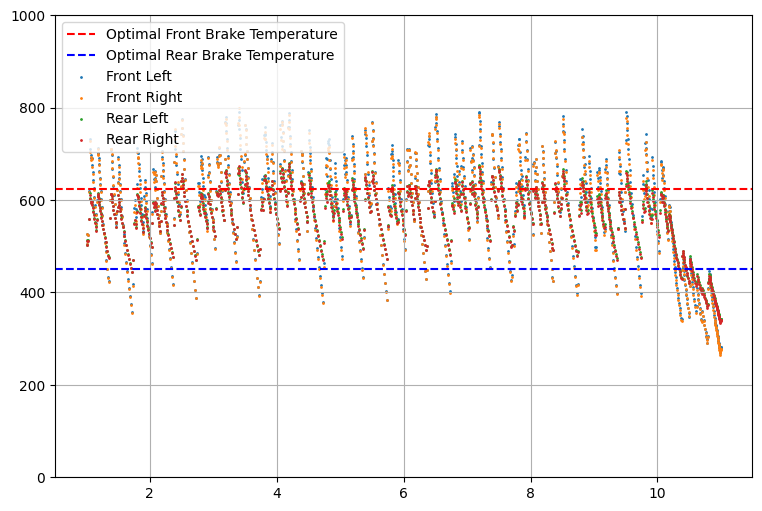

In [11]:
# Brake Temperature
x_axis = df["LapsCompleted"] + df["TrackPosition"]
y_axis_1, y_axis_2, y_axis_3, y_axis_4  = df["BrakeTemperatureFrontLeft"], df["BrakeTemperatureFrontRight"], df["BrakeTemperatureRearLeft"], df["BrakeTemperatureRearRight"]
plt.figure(figsize=(chart_size_x,chart_size_y))
plt.ylim(0, 1000)
plt.axhline(y=625, color="red", linestyle="--", label="Optimal Front Brake Temperature")
plt.axhline(y=450, color="blue", linestyle="--", label="Optimal Rear Brake Temperature")
plt.scatter(x_axis, y_axis_1, s=1, label="Front Left")
plt.scatter(x_axis, y_axis_2, s=1, label="Front Right")
plt.scatter(x_axis, y_axis_3, s=1, label="Rear Left")
plt.scatter(x_axis, y_axis_4, s=1, label="Rear Right")
plt.legend(loc="upper left")
plt.grid()
plt.show()